In [1]:
import pandas as pd
import numpy as np
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
from scipy import spatial
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Data Pre-Processing & Model Building

In [2]:
train_path = 'D:\\2021-2022 BE PROJECT\\singnature verification\\Real-Forge-Signature-Detection-main\\Dataset_Signature_Final\\Dataset\dataset1\\train'
test_path = 'D:\\2021-2022 BE PROJECT\\singnature verification\\Real-Forge-Signature-Detection-main\\Dataset_Signature_Final\\Dataset\\dataset1\\test'

In [3]:
Image_Width = 512
Image_Height = 512
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=15

In [4]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width,Image_Height, Image_Channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 510, 510, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 253, 253, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 64)      0

# What are callbacks?
Callbacks is a powerfull tool which is used to customize the behaviour of keras or tensorflow model during training, evaluaton or inference

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]

# Data Pre-processing
Now we need to read all the images from the folder.
When we'll be reading the data from the folders we also need to make sure that we need to do some Data Augmentation.
The Data Augmentation can be done by using ImageDataGenerator library.
The ImageDataGenerator what is does that it applies the Data Augmentation techniques like zooming, scaling, horizontal flipping, vertical flipping, etc.
IN THE TEST DATA WE SHOULD NEVER PERFORM DATA AUGMENTATION WE SHOULD ONLY PERFORM SCALING.

In [7]:
# Scaling all the images between 0 to 1 and applying Data Augmentation

train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,)

In [8]:
train_generator = train_datagen.flow_from_directory('D:\\2021-2022 BE PROJECT\\singnature verification\\Real-Forge-Signature-Detection-main\\Dataset_Signature_Final\\Dataset\dataset1\\train',
                                              target_size=Image_Size,
                                              batch_size=32,
                                              class_mode = 'categorical')


Found 120 images belonging to 2 classes.


In [9]:
# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
test_generator = test_datagen.flow_from_directory('D:\\2021-2022 BE PROJECT\\singnature verification\\Real-Forge-Signature-Detection-main\\Dataset_Signature_Final\\Dataset\\dataset1\\test',
                                                  target_size=Image_Size,
                                                  batch_size = 32,
                                                  class_mode='categorical')

Found 120 images belonging to 2 classes.


In [ ]:
epochs = 10

history = model.fit_generator(train_generator,
                             epochs=epochs,
                             validation_data=test_generator,
                             validation_steps=len(test_generator),
                             steps_per_epoch=len(train_generator),
                             callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
4/4 [==============================] - 330s 82s/step - loss: 1.7335 - accuracy: 0.5250 - val_loss: 0.8059 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
4/4 [==============================] - 306s 77s/step - loss: 1.1614 - accuracy: 0.6000 - val_loss: 0.9101 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
4/4 [==============================] - 301s 75s/step - loss: 0.9723 - accuracy: 0.6250 - val_loss: 0.9342 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
4/4 [==============================] - 327s 82s/step - loss: 1.1660 - accuracy: 0.5833 - val_loss: 1.3454 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
4/4 [==============================] - 299s 75s/step - loss: 0.9366 - accuracy: 0.6250 - val_loss: 2.0368 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/10
4/4 [==============================] - 305s 76s/step - loss: 0.9074 - accuracy: 0.6500 - val_loss: 2.6111 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 

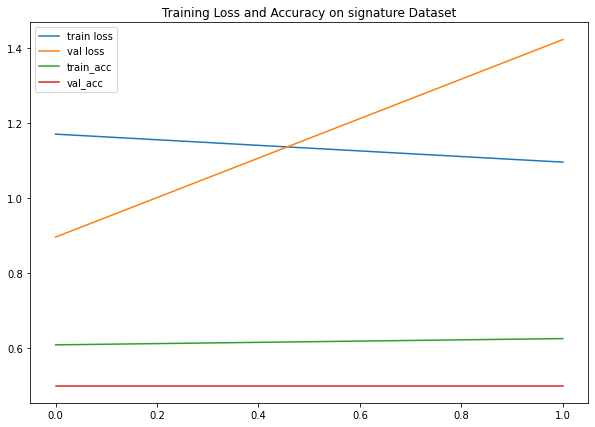

In [12]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on signature Dataset")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

In [13]:
from tensorflow.keras.models import load_model

model.save('forge_real_signature_model.h5')

# Making our prediction with our model

In [14]:
pred = model.predict(test_generator)
pred

array([[0.06114511, 0.9388549 ],
       [0.0621972 , 0.93780285],
       [0.06242954, 0.93757045],
       [0.06327129, 0.9367287 ],
       [0.06177233, 0.93822765],
       [0.06009846, 0.93990153],
       [0.06196165, 0.93803835],
       [0.06332577, 0.93667424],
       [0.06117525, 0.9388248 ],
       [0.06276337, 0.9372366 ],
       [0.06217993, 0.93782   ],
       [0.06192305, 0.938077  ],
       [0.061853  , 0.93814695],
       [0.0625878 , 0.93741214],
       [0.06151061, 0.93848944],
       [0.06145671, 0.9385433 ],
       [0.06146239, 0.9385376 ],
       [0.06230403, 0.9376959 ],
       [0.061279  , 0.938721  ],
       [0.06223351, 0.9377665 ],
       [0.06334312, 0.93665683],
       [0.06000682, 0.93999314],
       [0.06310263, 0.93689734],
       [0.06229892, 0.93770105],
       [0.06265026, 0.93734974],
       [0.06266186, 0.9373381 ],
       [0.06060502, 0.93939495],
       [0.06109922, 0.93890077],
       [0.0614792 , 0.93852085],
       [0.06008078, 0.93991923],
       [0.

In [15]:
import numpy as np

pred = np.argmax(pred, axis=1)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
model = load_model('forge_real_signature_model.h5')

In [17]:
from tensorflow.keras.preprocessing import image

img = image.load_img('D:/2021-2022 BE PROJECT/singnature verification/Real-Forge-Signature-Detection-main/Dataset_Signature_Final/Dataset/dataset1/test/forge/02101003.png', target_size=(512,512))

In [18]:
x = image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [19]:
x.shape

(512, 512, 3)

In [20]:
x = x/255

from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 512, 512, 3)

In [21]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [22]:
a=np.argmax(model.predict(img_data), axis=1)

In [23]:
if(a==1):
    print("The signature is genuine")
else:
    print("The signature is fraud")

The signature is fraud
